In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import process_data.directions_coordinates as dc
import process_data.duplicate_and_overlap as do
import process_data.sincos as sincos
import process_data.plot_polymer_histgram as my_plot
import functions as func
import process_data.n_n_distance as nn
import json
from tqdm.auto import tqdm
import fnn.four_layers as model

# For on-lattices

## Random
### try the z dimension is 4

In [3]:

def on_lattices_random(polymer_len, z_dim, generator, num_polymer, total_epochs, saving_step,folder_name):
    epoch = [i for i in range(saving_step, total_epochs, saving_step)]
    nn_distance = []
    real_directions = np.load(f'../data/random/on_lattices/{polymer_len}/directions.npy')
    real_sin_cos = np.load(f'../data/random/on_lattices/{polymer_len}/sin_cos.npy')
    real_coordinates = np.load(f'../data/random/on_lattices/{polymer_len}/coordinates.npy')
    for i in tqdm(range(saving_step, total_epochs, saving_step)):
        noise = func.get_noise(num_polymer, z_dim)
        check_point = torch.load('../experiments/'+ folder_name + f'/on_lattices_{polymer_len}/four_layers_gen_{i}.pth.tar')
        generator.load_state_dict(check_point['gen_state_dict'])
        output = generator(noise).data.numpy()
        fake_directions = sincos.sin_cos_to_directions_on_lattices(output)
        coordinates = dc.direction_coordinate_on_lattices(fake_directions)
        nn_distance.append(nn.n_n_distance(coordinates))
    my_plot.check_output_hist(output, 'histogram of output')
    my_plot.check_output_hist(fake_directions, 'histogram of directions')
    plt.plot(epoch, np.array(nn_distance)/np.sqrt(polymer_len - 1 ), label='n to n distance')
    plt.ylim(0.3,1.3)
    plt.legend()
    plt.show()
    # todo:
    # need to check the overlap and mode collapse
    overlap = do.check_overlap(real_directions, fake_directions)
    num_unique = do.check_unique(fake_directions)
    print(f'number of overlap polymers are {overlap}')
    print(f'number of unique polymers are {num_unique}')

### 16 monomers

In [ ]:
z_dim = 4
polymer_len = 16
epochs = 2000
step_size = 50
polymer_dim = (polymer_len - 2) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
on_lattices_random(polymer_len, z_dim, generator, 10000, epochs + step_size, step_size, 11_11)

### 32 monomers

In [ ]:
z_dim = 4
polymer_len = 32
epochs = 2000
step_size = 50
polymer_dim = (polymer_len - 2) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
on_lattices_random(polymer_len, z_dim, generator, 10000, epochs + step_size, step_size)

### 64 monomers

In [ ]:
z_dim = 4
polymer_len = 64
polymer_dim = (polymer_len - 2) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
on_lattices_random(polymer_len, z_dim, generator, 10000, epochs + step_size, step_size, '11_11')

## try z dimension is 8

In [5]:
epochs = 500
step_size = 50

number of overlap polymers are 0
number of unique polymers are 2169


  0%|          | 0/25 [00:00<?, ?it/s]

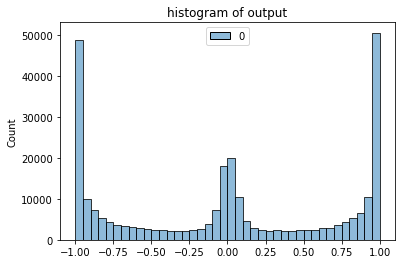

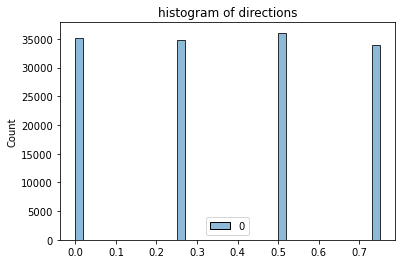

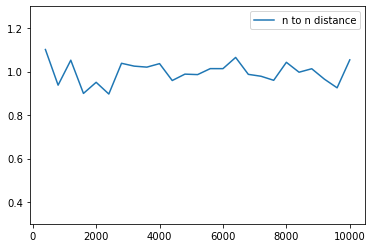

number of overlap polymers are 0
number of unique polymers are 2132


In [23]:
z_dim = 8
polymer_len = 16
polymer_dim = (polymer_len - 2) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
on_lattices_random(polymer_len, z_dim, generator, 10000, epochs + step_size, step_size, '11_13')

  0%|          | 0/25 [00:00<?, ?it/s]

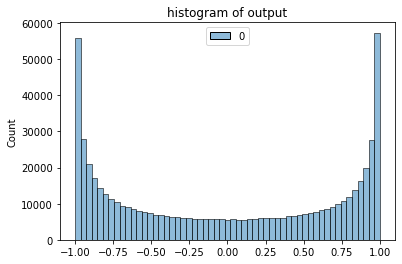

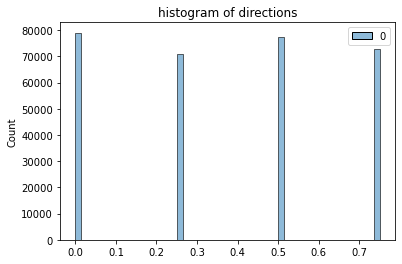

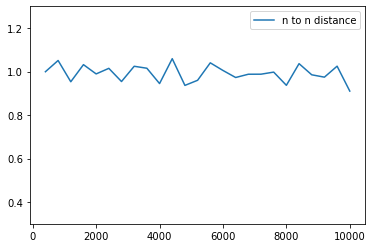

number of overlap polymers are 0
number of unique polymers are 9955


In [24]:
z_dim = 8
polymer_len = 32
polymer_dim = (polymer_len - 2) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
on_lattices_random(polymer_len, z_dim, generator, 10000, epochs + step_size, step_size, '11_13')

  0%|          | 0/10 [00:00<?, ?it/s]

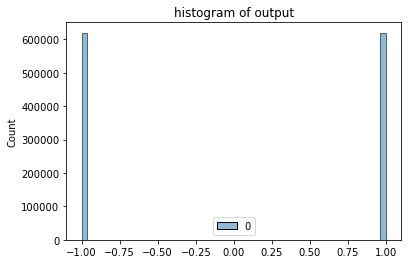

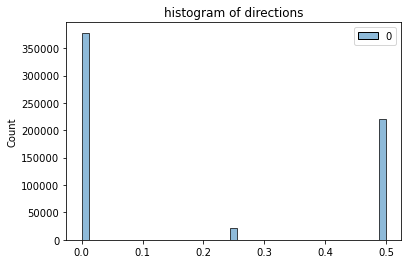

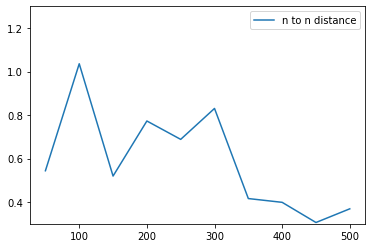

number of overlap polymers are 0
number of unique polymers are 16


In [9]:
z_dim = 8
polymer_len = 64
polymer_dim = (polymer_len - 2) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
on_lattices_random(polymer_len, z_dim, generator, 10000, epochs + step_size, step_size, '11_17')

# For off lattices

In [2]:
def off_lattices_random(polymer_len, z_dim, generator, num_polymer, total_epochs, saving_step, folder_name):
    epoch = [i for i in range(saving_step, total_epochs, saving_step)]
    nn_distance = []
    real_directions = np.load(f'../data/random/off_lattices/{polymer_len}/directions.npy')
    real_sin_cos = np.load(f'../data/random/off_lattices/{polymer_len}/sin_cos.npy')
    real_coordinates = np.load(f'../data/random/off_lattices/{polymer_len}/coordinates.npy')
    for i in tqdm(range(saving_step, total_epochs, saving_step)):
        noise = func.get_noise(num_polymer, z_dim)
        check_point = torch.load('../experiments/'+ folder_name + f'/off_lattices_{polymer_len}/four_layers_gen_{i}.pth.tar')
        generator.load_state_dict(check_point['gen_state_dict'])
        output = generator(noise).data.numpy()
        fake_directions = sincos.sin_cos_directions_off_lattices(output)
        coordinates = dc.direction_coordinate_off_lattices(fake_directions)
        nn_distance.append(nn.n_n_distance(coordinates))
    my_plot.check_output_hist(output, 'histogram of output')
    my_plot.check_output_hist(fake_directions, 'histogram of directions')
    # TODO
    fake_sin_cos = output.reshape(num_polymer, polymer_len - 1, 2)
    my_plot.check_component_hist(fake_sin_cos)
    plt.plot(epoch, np.array(nn_distance)/np.sqrt(polymer_len - 1), label='n to n distance')
    plt.ylim(0.3,1.3)
    plt.legend()
    plt.show()
    return coordinates, fake_directions, fake_sin_cos

In [ ]:
epochs = 550
step_size = 50
z_dim = 4
polymer_len = 16
polymer_dim = (polymer_len - 1) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
fake_coordinates, fake_directions, fake_sin_cos = off_lattices_random(polymer_len, z_dim, generator, 10000, epochs + step_size, step_size, '11_11')

In [ ]:
def check_component_hist(sin_cos, title):
    """
    the shape of sin_cos should be like:
    (x, y, 2)
    where x is the number of the polymer, 
    y is the length of the polymer, such as 15, 31, 63..
    """
    x = [] # x compoment, sin(\theta)
    y = [] # y compoment, cos(\theta)
    for i in sin_cos:
        for j in i:
            x.append(j[0])
            y.append(j[1])
    sns.kdeplot(x, label='sin ' + title)
    sns.kdeplot(y, label='cos ' + title)
    plt.legend()

In [ ]:
real_sin_cos = np.load('../data/random/off_lattices/16/sin_cos.npy')
check_component_hist(fake_sin_cos, 'fake')
check_component_hist(real_sin_cos, 'real')
plt.savefig('components', dpi = 800)

In [ ]:
real_sin = [] # x compoment, sin(\theta)
real_cos = [] # y compoment, cos(\theta)
fake_sin = []
fake_cos = []
for i in real_sin_cos:
    for j in i:
        real_sin.append(j[0])
        real_cos.append(j[1])
for i in fake_sin_cos:
    for j in i:
        fake_sin.append(j[0])
        fake_cos.append(j[1])

real_sin = np.array(real_sin)
real_cos = np.array(real_cos)
fake_sin = np.array(fake_sin)
fake_cos = np.array(fake_cos)

sns.kdeplot(real_sin, label = 'real')
sns.kdeplot(fake_sin, label = 'fake')
plt.legend()
plt.show()


In [ ]:
z_dim = 4
polymer_len = 32
polymer_dim = (polymer_len - 1) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
off_lattices_random(polymer_len, z_dim, generator, 10000, epochs + step_size, step_size, '11_11')

In [ ]:
z_dim = 4
polymer_len = 64
polymer_dim = (polymer_len - 1) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
off_lattices_random(polymer_len, z_dim, generator, 10000, epochs + step_size, step_size, '11_11')

  0%|          | 0/10 [00:00<?, ?it/s]

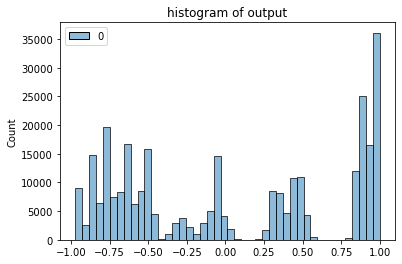

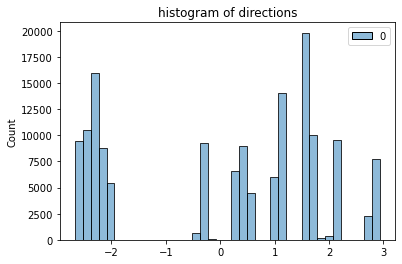

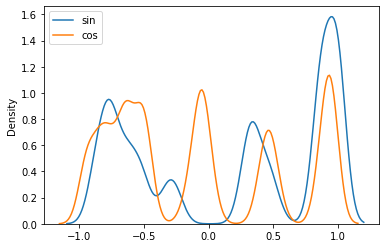

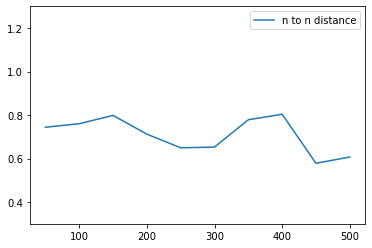

In [3]:
epochs = 500
step_size = 50
z_dim = 8
polymer_len = 16
polymer_dim = (polymer_len - 1) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
fake_coordinates, fake_directions, fake_sin_cos = off_lattices_random(polymer_len, z_dim, generator, 10000, epochs + step_size, step_size, '11_17')

  0%|          | 0/20 [00:00<?, ?it/s]

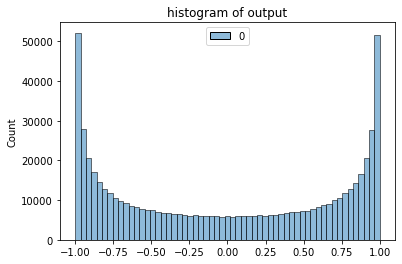

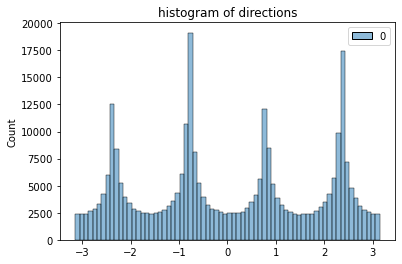

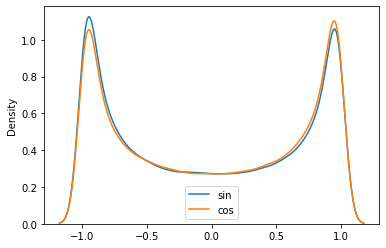

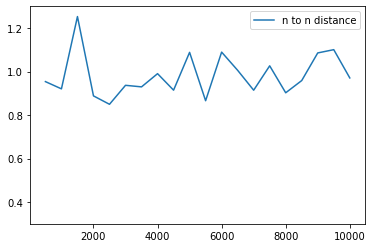

In [10]:
z_dim = 8
polymer_len = 32
polymer_dim = (polymer_len - 1) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
fake_coordinates, fake_directions, fake_sin_cos = off_lattices_random(polymer_len, z_dim, generator, 10000, epochs + step_size, step_size, '11_14')

In [13]:
z_dim = 8
polymer_len = 64
polymer_dim = (polymer_len - 1) * 2
generator = model.GeneratorNet(z_dim, polymer_dim)
fake_coordinates, fake_directions, fake_sin_cos = off_lattices_random(polymer_len, z_dim, generator, 10000, epochs + step_size, step_size, '11_17')

  0%|          | 0/10 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: '../experiments/11_17/off_lattices_64/four_layers_with_dropout_gen_50.pth.tar'

check algorithm

用 off-lattice 测试 on-lattices

In [ ]:
real_sin_cos = np.load('../data/random/off_lattices/16/sin_cos.npy')
my_plot.check_component_hist(real_sin_cos)

In [ ]:
def check_component_hist(sin_cos):
    """
    the shape of sin_cos should be like:
    (x, y, 2)
    where x is the number of the polymer, 
    y is the length of the polymer, such as 15, 31, 63..
    """
    x = [] # x compoment, sin(\theta)
    y = [] # y compoment, cos(\theta)
    for i in sin_cos:
        for j in i:
            x.append(j[0])
            y.append(j[1])
    sns.kdeplot(x, label='sin')
    sns.kdeplot(y, label='cos')
    plt.legend()